In [4]:
import torch
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
import cProfile
import numpy as np
import scipy
import numpyro
import jax
import math
import pyro
import torch.nn.functional as F

In [50]:
def fibsolver(d):
    x=1
    for i in range(10):
        t = (-x**(d+1)+x+1)/((d+1)*x**d-1)
        x+=t
    return x
phi_d_dict = {i:fibsolver(i) for i in range(1,10000)}

In [64]:
d=3
440*np.array([1]+d*[1/phi_d_dict[d]])**np.arange(0,d+1)

array([440.        , 360.43590589, 295.25918695, 241.86821028])

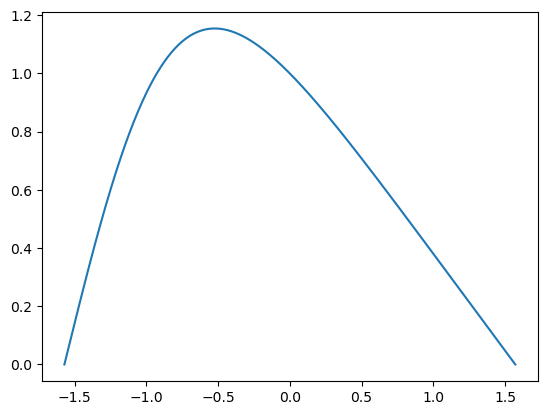

In [64]:
x= np.linspace(-np.pi/2, np.pi/2, 10000)
c = 1
s = 2*np.cos(x)/(c*np.sin(x)+c+1)
plt.plot(x, s)

1.5707963267948966


/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_1114/3052804565.py:7: RuntimeWarning: divide by zero encountered in log
  kl_change = -p_0*np.log(p/p_0)-(1-p_0)*np.log((1-p)/(1-p_0))


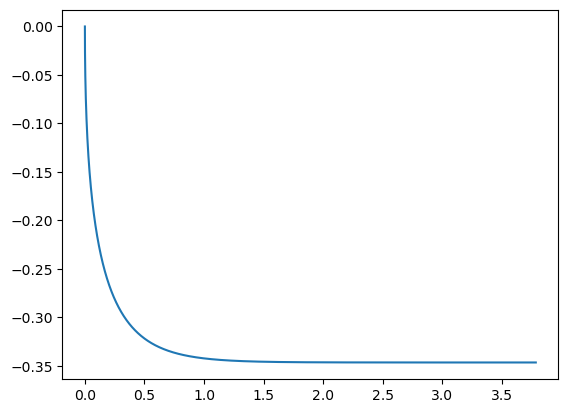

In [88]:
x_0 = 0
s = np.linspace(0,np.pi/2-x_0,1000)
print(np.pi/2)
p_0 = np.sin((x_0)/2+np.pi/4)
p = np.sin((x_0+s)/2+np.pi/4)
loss_change = -np.log(p) +np.log(p_0)
kl_change = -p_0*np.log(p/p_0)-(1-p_0)*np.log((1-p)/(1-p_0))
plt.plot(kl_change, loss_change)
x_0 = 1

In [93]:
2+2*torch.erf(torch.tensor([1/2**.5]))+torch.sqrt(torch.tensor([2/torch.e]))

tensor([3.3654])

In [94]:
np.pi*np.e

3.141592653589793

In [123]:
activation_expected_square = 2+2*scipy.special.erf(1/2**.5)-np.sqrt(2/(np.e*np.pi))

In [121]:
x = np.random.randn(1000000)
(((x[x<-1]-1)**2).sum() + ((x[x>1]+1)**2).sum() + ((2*x[(x<=1)*(x>=-1)])**2).sum())/len(x)

2.8814814813239678

767.1155867726795

0


/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_1114/1437051248.py:3: RuntimeWarning: invalid value encountered in sqrt
  vals = (-3 + np.sqrt(9-24*c*np.cos(x)*(1+np.sin(x))))/(2*c*(np.sin(x)+1))
/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_1114/1437051248.py:3: RuntimeWarning: invalid value encountered in divide
  vals = (-3 + np.sqrt(9-24*c*np.cos(x)*(1+np.sin(x))))/(2*c*(np.sin(x)+1))


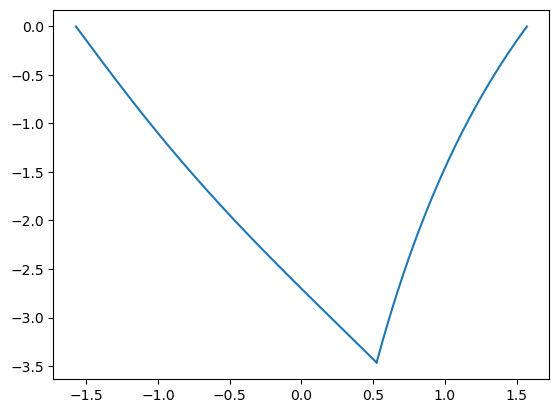

In [60]:
c=1/(2*np.sqrt(3))

vals = (-3 + np.sqrt(9-24*c*np.cos(x)*(1+np.sin(x))))/(2*c*(np.sin(x)+1))
plt.plot(x, vals)
# plt.ylim([0, None])
# plt.yscale('log')
print(vals.argmin())

In [55]:
vals

array([        nan, -0.00062839, -0.00125676, ..., -0.00125697,
       -0.00062843,  0.        ])

In [50]:
vals.clip(10)

array([           inf, 1.05275006e+08, 2.63187520e+07, ...,
       1.00000000e+01, 1.00000000e+01, 1.00000000e+01])

In [24]:
np.argmin(vals)

997

In [16]:
x

array([-3.14159265, -3.13530318, -3.1290137 , -3.12272423, -3.11643475,
       -3.11014528, -3.1038558 , -3.09756633, -3.09127686, -3.08498738,
       -3.07869791, -3.07240843, -3.06611896, -3.05982948, -3.05354001,
       -3.04725053, -3.04096106, -3.03467158, -3.02838211, -3.02209263,
       -3.01580316, -3.00951368, -3.00322421, -2.99693473, -2.99064526,
       -2.98435578, -2.97806631, -2.97177683, -2.96548736, -2.95919788,
       -2.95290841, -2.94661894, -2.94032946, -2.93403999, -2.92775051,
       -2.92146104, -2.91517156, -2.90888209, -2.90259261, -2.89630314,
       -2.89001366, -2.88372419, -2.87743471, -2.87114524, -2.86485576,
       -2.85856629, -2.85227681, -2.84598734, -2.83969786, -2.83340839,
       -2.82711891, -2.82082944, -2.81453996, -2.80825049, -2.80196102,
       -2.79567154, -2.78938207, -2.78309259, -2.77680312, -2.77051364,
       -2.76422417, -2.75793469, -2.75164522, -2.74535574, -2.73906627,
       -2.73277679, -2.72648732, -2.72019784, -2.71390837, -2.70

In [58]:
np.array(d*[1/phi_d_dict[d]]+[1])

array([0.75487767, 0.75487767, 1.        ])

In [130]:
alpha = np.array([8,6,4,2])
alpha_0 = np.array([10,20,30,40])
num_samples = 10000
n=500

K=len(alpha_0)
d=K+1
step_vector = np.array(d*[1/phi_d_dict[d]])**np.arange(1,d+1)
raw_randomness = (np.random.random(d)+step_vector*np.expand_dims(np.arange(1,num_samples+1),-1))%1

gamma_vars = scipy.stats.gamma.ppf(raw_randomness[:,:K],alpha_0)
dirichlet_vars = (gamma_vars.transpose()/gamma_vars.sum()).transpose()
n_vars = (raw_randomness[:,-1]*n-.5).round()
dist = numpyro.distributions.Multinomial(n_vars, dirichlet_vars)
x = torch.tensor(np.array(dist.sample(jax.random.PRNGKey(0))))
dirichlet_vars = torch.tensor(dirichlet_vars)
(-dirichlet_vars*torch.log((x+alpha)/(x+alpha).sum(axis=-1).unsqueeze(-1))).sum(axis=-1).sum(axis=0).mean()

NameError: name 'phi_d_dict' is not defined

In [141]:
dist = pyro.distributions.Multinomial(10,torch.tensor([.2,.2,.2,.2,.2]))
dist.sample(dtype=torch.int)

TypeError: Multinomial.sample() got an unexpected keyword argument 'dtype'

In [137]:
dist = pyro.distributions.DirichletMultinomial(torch.FloatTensor([1,2,3,4,5]))
# dist.log_prob(np.array([0,0,0,0,1]))

In [138]:
dist.sample(jax.random.PRNGKey(0))

RuntimeError: cannot reshape tensor of 0 elements into shape [0, 0, -1] because the unspecified dimension size -1 can be any value and is ambiguous

In [1264]:
alpha = torch.tensor([[1,2,3,4,5],[10,9,8,7,6]])
x = torch.tensor([[5,4,3,2,1],[6,7,8,9,10]])
# alpha = torch.tensor([1,2,3,4,5])
# x = torch.tensor([5,4,3,2,1])


In [1265]:
dirichlet_multinomial_likelihood_loss(x,alpha)

tensor([10.3425,  9.7559])

In [ ]:
(torch.lgamma(x+1) + torch.lgamma(alpha) - torch.lgamma(posterior_evidence)).sum() +torch.lgamma(posterior_evidence.sum()) - torch.lgamma(alpha.sum()) - torch.lgamma(x.sum()+1)

In [1253]:
dirichlet_multinomial_likelihood_loss(torch.tensor([1,2,3,4,7]), torch.tensor([5,4,3,2,1]))

tensor(11.3606)

In [186]:
-dirichlet_vars*torch.log((x+alpha)/(x+alpha).sum(axis=-1).unsqueeze(-1))

tensor([[0.2112, 0.2075, 0.4087, 0.4894],
        [0.2499, 0.3433, 0.3881, 0.3105],
        [0.1597, 0.2887, 0.3545, 0.5887],
        [0.1740, 0.3526, 0.3457, 0.4205],
        [0.1544, 0.2798, 0.4167, 0.4582],
        [0.1149, 0.2918, 0.5397, 0.5145],
        [0.1645, 0.2949, 0.3746, 0.4066],
        [0.0709, 0.2448, 0.5803, 0.6142],
        [0.2766, 0.2566, 0.3466, 0.4600],
        [0.1647, 0.2915, 0.3723, 0.6012],
        [0.2673, 0.2992, 0.3411, 0.4414],
        [0.1592, 0.1691, 0.4382, 0.6724],
        [0.1769, 0.4063, 0.2898, 0.4743],
        [0.1427, 0.3306, 0.3580, 0.4577],
        [0.1688, 0.2946, 0.4384, 0.3620],
        [0.1417, 0.2785, 0.4539, 0.4391],
        [0.0960, 0.3260, 0.4110, 0.4196],
        [0.2315, 0.3080, 0.3647, 0.4361],
        [0.1787, 0.3164, 0.4036, 0.4087],
        [0.1611, 0.2674, 0.3427, 0.6453],
        [0.1153, 0.2090, 0.6138, 0.5825],
        [0.1500, 0.3110, 0.3976, 0.4556],
        [0.1045, 0.3306, 0.4523, 0.5557],
        [0.1236, 0.2556, 0.4054, 0

In [168]:
alpha = torch.tensor([8,6,4,2])
alpha_0 = torch.tensor([10,20,30,40])

In [189]:
K=len(alpha_0)
d=K+1
step_vector = np.array(d*[1/phi_d_dict[d]])**np.arange(1,d+1)
raw_randomness = (np.random.random(d)+step_vector*np.expand_dims(np.arange(1,100+1),-1))%1

gamma_vars = scipy.stats.gamma.ppf(raw_randomness[:,:K],alpha_0)
dirichlet_vars = (gamma_vars.transpose()/gamma_vars.sum(axis=1)).transpose()
n_vars = (raw_randomness[:,-1]*100-.5).round()
dist = numpyro.distributions.Multinomial(n_vars, dirichlet_vars)
x = torch.tensor(np.array(dist.sample(jax.random.PRNGKey(0))))
dirichlet_vars = torch.tensor(dirichlet_vars)
(-dirichlet_vars*torch.log((x+alpha)/(x+alpha).sum(axis=-1).unsqueeze(-1))).sum(axis=1).mean()

tensor(1.3510, dtype=torch.float64)

In [411]:
def simulated_lifetime_loss(alpha, alpha_0, n, samples):
    K=len(alpha_0)
    d=K+1
    step_vector = np.array(d*[1/phi_d_dict[d]])**np.arange(1,d+1)
    raw_randomness = (np.random.random(d)+step_vector*np.expand_dims(np.arange(1,samples+1),-1))%1

    gamma_vars = scipy.stats.gamma.ppf(raw_randomness[:,:K],alpha_0)
    dirichlet_vars = (gamma_vars.transpose()/gamma_vars.sum(axis=1)).transpose()
    n_vars = (raw_randomness[:,-1]*n-.5).round()
    dist = numpyro.distributions.Multinomial(n_vars, dirichlet_vars)
    x = torch.tensor(np.array(dist.sample(jax.random.PRNGKey(0))))
    dirichlet_vars = torch.tensor(dirichlet_vars)
    return (-dirichlet_vars*torch.log((x+alpha)/(x+alpha).sum(axis=-1).unsqueeze(-1))).sum(axis=-1).mean()*n

In [370]:
scipy.stats.gamma.ppf(.7,alpha_0)

array([1.2039728 , 2.43921648])

In [148]:
def sim_lifetime_loss_plot(alpha_0, n, samples, lower_limit, upper_limit):
    K=len(alpha_0)
    d=K+1
    step_vector = np.array(d*[1/phi_d_dict[d]])**np.arange(1,d+1)
    raw_randomness = (np.random.random(d)+step_vector*np.expand_dims(np.arange(1,samples+1),-1))%1

    gamma_vars = scipy.stats.gamma.ppf(raw_randomness[:,:K],alpha_0)
    dirichlet_vars = (gamma_vars.transpose()/gamma_vars.sum(axis=1)).transpose()
    n_vars = (raw_randomness[:,-1]*n-.5).round()
    dist = numpyro.distributions.Multinomial(n_vars, dirichlet_vars)
    x = torch.tensor(np.array(dist.sample(jax.random.PRNGKey(0))))
    dirichlet_vars = torch.tensor(dirichlet_vars)
    plt.plot([(-dirichlet_vars*torch.log((x+i*torch.ones(2))/(x+i*torch.ones(2)).sum(axis=-1).unsqueeze(-1))).sum(axis=-1).sum(axis=0).mean() for i in range(lower_limit, upper_limit)])

In [239]:
simulated_lifetime_loss(np.array([20,1]), np.array([40,40]), 100, 1000000)

tensor(0.7920, dtype=torch.float64)

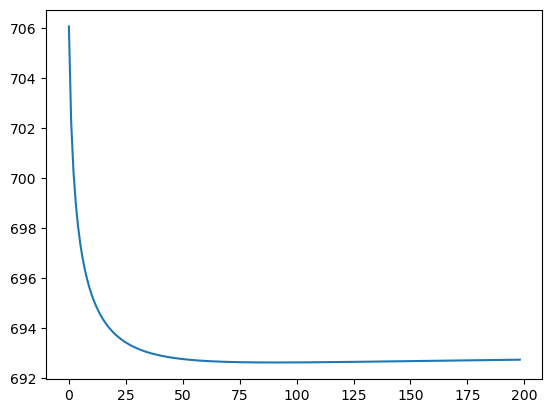

In [245]:
sim_lifetime_loss_plot(100*torch.ones(2), 100, 1000, 1, 200)

In [12]:
def trapezoid_integration(x_dist,y_dist, definite=True):
    if definite:
        return np.diff(x_dist).dot((y_dist[:-1]+y_dist[1:])/2)
    else:
        return np.insert(np.cumsum(np.diff(x_dist)*((y_dist[:-1]+y_dist[1:])/2)), 0, 0)

array([[1716.21745662, 1617.47454694],
       [1617.47454694, 1716.21745555]])

In [1279]:
def grad_modifier(a,b):
    epsilon = .000001
    x=np.arange(.001,1,.001)
    inv_beta_cdf_a_movement = (scipy.special.logit(scipy.special.betaincinv(a+epsilon,b,x))-scipy.special.logit(scipy.special.betaincinv(a,b,x)))/epsilon
    inv_beta_cdf_b_movement = (scipy.special.logit(scipy.special.betaincinv(a,b+epsilon,x))-scipy.special.logit(scipy.special.betaincinv(a,b,x)))/epsilon

    a2_int = trapezoid_integration(x,inv_beta_cdf_a_movement**2)
    b2_int = trapezoid_integration(x,inv_beta_cdf_b_movement**2)
    ab_int = trapezoid_integration(x,inv_beta_cdf_a_movement*inv_beta_cdf_b_movement)
    hessian = np.array([[a2_int, ab_int],[ab_int,b2_int]])
    # eigenvalues, eigenvectors = np.linalg.eig(hessian)
    # easiest_direction = eigenvectors[:,np.argmin(eigenvalues)]
    # slope = easiest_direction[1]/easiest_direction[0]
    try:
        grad_modifier_matrix = np.linalg.inv(hessian+.0001*np.identity(len(hessian)))
    except:
        print(hessian)
    return grad_modifier_matrix

In [135]:
print(grad_modifier(5,80))
print(grad_modifier(80,5))

[[ 4.6700519   4.92846318]
 [ 4.92846318 95.72964175]]
[[95.72964148  4.92846313]
 [ 4.92846313  4.6700519 ]]


In [10]:
torch.prod((torch.arange(1,5)*2))

tensor(384)

In [21]:
9*7*5*3

945

In [26]:
1/(1-(150000/(945*384))**.25)

5.046160981180267

In [14]:
int(torch.prod(torch.arange(1,13)*2)/8)

245248819200

In [23]:
int(torch.prod(torch.arange(8)*2+1))

2027025

In [820]:
def approximate_lifetime_loss(alpha, alpha_0, conjectured = False):
    model_evidence = alpha.sum()
    target_evidence = alpha_0.sum()
    if conjectured:
        # return model_evidence*((alpha_0/target_evidence).dot(torch.digamma(alpha_0+1)-torch.log(alpha/model_evidence))-torch.digamma(target_evidence+1))-.5*torch.log(model_evidence)
        return model_evidence*((alpha_0/target_evidence).dot(torch.digamma(alpha_0+1)-torch.log(alpha/model_evidence))-torch.digamma(target_evidence+1))
    else:
        alpha_0, beta_0 = alpha_0[0], alpha_0[1]
        predicted_prob = alpha[0]/model_evidence
        return model_evidence/2*(1/(target_evidence-2)+(alpha_0-1)*(target_evidence-1)/((target_evidence-2)*(beta_0-1))-2*predicted_prob*(target_evidence-1)/(beta_0-1)+predicted_prob**2*(target_evidence-1)*(target_evidence-2)/((alpha_0-1)*(beta_0-1)))-.5*torch.log(model_evidence)

In [925]:
n=10
n_hat=20
p_hat=.8
a_0=16
b_0=4
k=torch.arange(0,n+1)
n_hat*(scipy.special.digamma(n_hat*p_hat)-scipy.special.digamma(n_hat*(1-p_hat)))-n_hat*torch.exp(math.lgamma(n+1)+math.lgamma(a_0+b_0)-math.lgamma(a_0)-math.lgamma(b_0)-math.lgamma(a_0+b_0+1)+torch.logsumexp(torch.lgamma(a_0+k)+torch.lgamma(b_0+n-k)-torch.lgamma(k+1)-torch.lgamma(n-k+1)+torch.log(torch.digamma(n_hat*p_hat+k)-torch.digamma(n_hat*(1-p_hat)+n-k)),0))

tensor(-1.0793e+14)

In [1205]:
def likelihood_loss(n,n_hat,p_hat):
    k=torch.arange(0,n.item()+1,dtype=torch.float32)
    # return -torch.lgamma(n+1)-torch.lgamma(n_hat*p_hat+k)-torch.lgamma(n_hat*(1-p_hat)+n-k)-torch.lgamma(n_hat)+torch.lgamma(k+1)+torch.lgamma(n-k+1)+torch.lgamma(n_hat+n)+torch.lgamma(n_hat*p_hat)+torch.lgamma(n_hat*(1-p_hat))
    return -torch.lgamma(n_hat*p_hat+k)-torch.lgamma(n_hat*(1-p_hat)+n-k)-torch.lgamma(n_hat)+torch.lgamma(n_hat+n)+torch.lgamma(n_hat*p_hat)+torch.lgamma(n_hat*(1-p_hat))
    

def get_k_probs(n, a_0, b_0):
    k=torch.arange(0,n+1)
    return torch.exp(math.lgamma(n+1)-torch.lgamma(k+1)-torch.lgamma(n-k+1)+math.lgamma(a_0+b_0)-math.lgamma(a_0)-math.lgamma(b_0)+torch.lgamma(a_0+k)+torch.lgamma(b_0+n-k)-math.lgamma(a_0+b_0+n))

tensor([1.0000e-04])


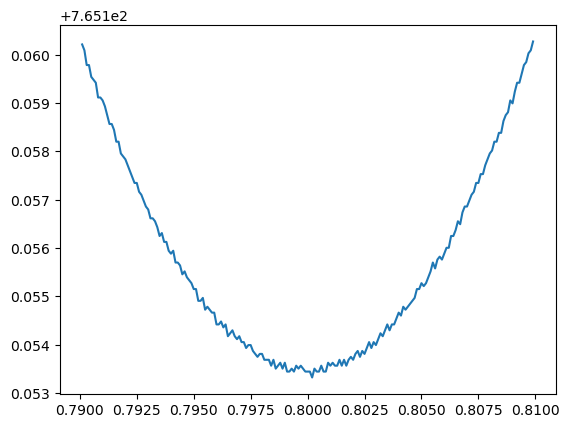

In [1209]:
n=1600
n_hat=20
p_hat=.8
a_0=16
b_0=4
p = torch.linspace(0,1,10001).unsqueeze(1)
losses = torch.matmul(likelihood_loss(torch.tensor([n]),torch.tensor([n_hat]),p),get_k_probs(n,a_0,b_0))
losses[losses.isnan()] = float('-inf')
print(p[losses.argmax()])
plt.plot(p[(.79<p)*(p<.81)],losses[((.79<p)*(p<.81)).view(-1)])

In [1108]:
len(losses)

10001

In [1111]:
p.shape

torch.Size([10001, 1])

In [1109]:
len(p)

10001

In [1102]:
p[(.7<p)*(p<.9)]

tensor([0.7000, 0.7001, 0.7002,  ..., 0.8997, 0.8998, 0.8999])

In [1113]:
((.7<p)*(p<.9)).view(-1)

tensor([False, False, False,  ..., False, False, False])

In [ ]:
plt.plot()

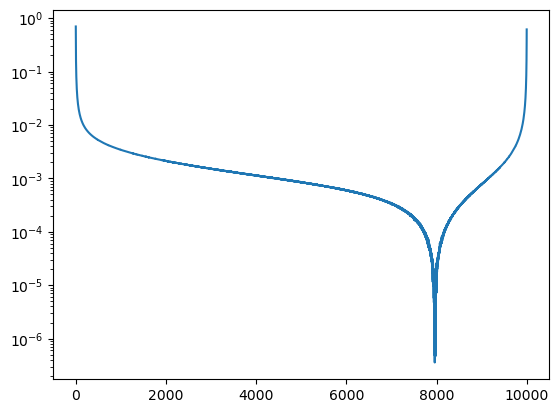

In [1096]:
plt.plot(torch.abs(losses.diff()))
plt.yscale('log')

In [1087]:
losses[losses.isnan()] = float('-inf')
p[losses.argmax()]

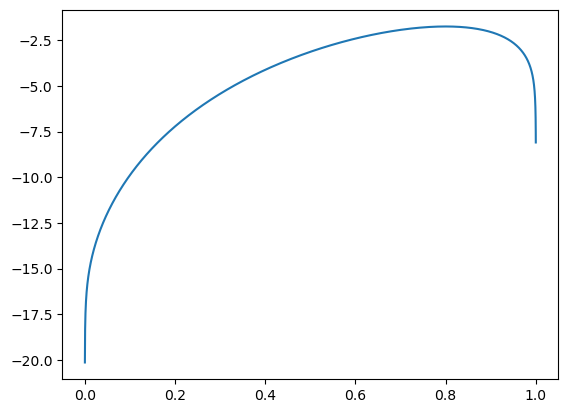

In [1072]:
plt.plot(p,))

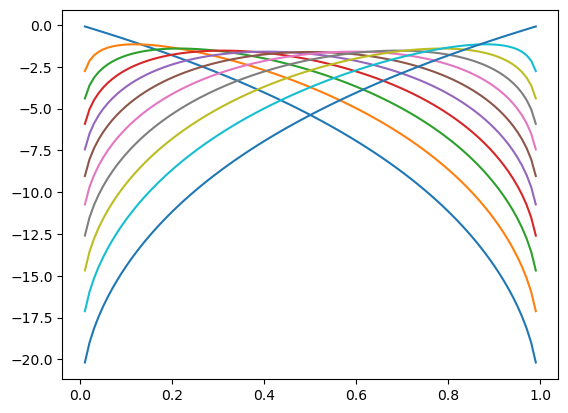

In [1064]:
plt.plot(p,likelihood_loss(10,20,p))

In [973]:
likelihood_loss(n=10,n_hat=20,p_hat=.8).dot(get_k_probs(n=10,a_0=16,b_0=4))

tensor(-1.7541)

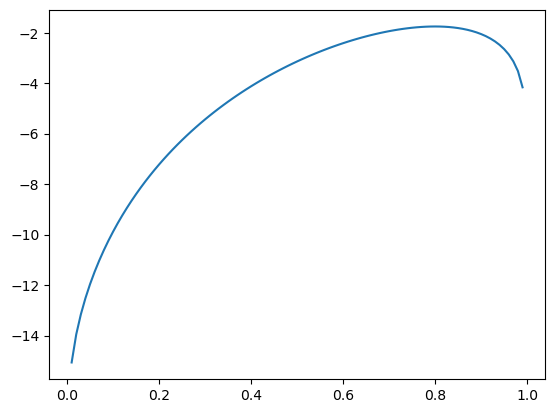

In [1008]:
num_points=100
plt.plot([i/num_points for i in range(1,num_points)],[likelihood_loss(n=10,n_hat=20,p_hat=i/num_points).dot(get_k_probs(n=10,a_0=16,b_0=4)).item() for i in range(1,num_points)])

In [1046]:
num_points=100001
k_probs=get_k_probs(n=10,a_0=24,b_0=6)
losses = np.array([likelihood_loss(n=10,n_hat=20,p_hat=i/num_points).dot(k_probs).item() for i in range(1,num_points)])
np.argmax(losses)/num_points

0.7987120128798711

In [1051]:
plt.plot(np.array([likelihood_loss(n=10,n_hat=20,p_hat=i/num_points) for i in range(1,num_points)]))

/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_35884/1953062619.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  plt.plot(np.array([likelihood_loss(n=10,n_hat=20,p_hat=i/num_points) for i in range(1,num_points)]))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (100000,) + inhomogeneous part.

In [1045]:
get_k_probs(n=10,a_0=24,b_0=6)

tensor([4.7236e-06, 7.5578e-05, 6.0732e-04, 3.2390e-03, 1.2754e-02, 3.8957e-02,
        9.4146e-02, 1.7933e-01, 2.6058e-01, 2.6472e-01, 1.4560e-01])

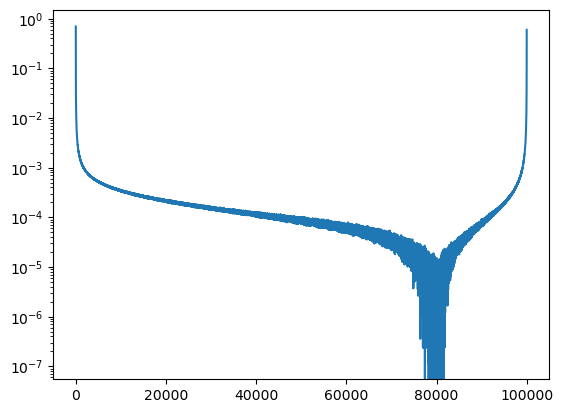

In [1047]:
plt.plot(np.abs(np.diff(losses)))
plt.yscale('log')

In [1010]:
epsilon=.01
(likelihood_loss(n=10,n_hat=20,p_hat=.8+epsilon).dot(get_k_probs(n=10,a_0=16,b_0=4)).item()-likelihood_loss(n=10,n_hat=20,p_hat=.8).dot(get_k_probs(n=10,a_0=16,b_0=4)).item())/epsilon

-0.22728443145751953

In [995]:
torch.linspace(0.01,.99,99)

tensor([0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800, 0.0900,
        0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700, 0.1800,
        0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600, 0.2700,
        0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500, 0.3600,
        0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400, 0.4500,
        0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300, 0.5400,
        0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200, 0.6300,
        0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100, 0.7200,
        0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000, 0.8100,
        0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900, 0.9000,
        0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800, 0.9900])

In [996]:
p = torch.linspace(0,1,1001)
plt.plot(p,[likelihood_loss(n=10,n_hat=20,p_hat=prob).dot(get_k_probs(n=10,a_0=16,b_0=4)) for prob in p])

ValueError: math domain error

In [967]:
likelihood_loss(10,20,.8)

tensor([-11.1568,  -8.6465,  -6.7941,  -5.3208,  -4.1194,  -3.1385,  -2.3558,
         -1.7703,  -1.4073,  -1.3428,  -1.8128])

In [971]:
n=10
n_hat=20
p_hat=.8
a_0=16
b_0=4
k=torch.arange(0,n+1)
loss = math.lgamma(n+1)+torch.lgamma(n_hat*p_hat+k)+torch.lgamma(n_hat*(1-p_hat)+n-k)+math.lgamma(n_hat)-torch.lgamma(k+1)-torch.lgamma(n-k+1)-math.lgamma(n_hat+n)-math.lgamma(n_hat*p_hat)-math.lgamma(n_hat*(1-p_hat))
k_probs = torch.exp(math.lgamma(n+1)-torch.lgamma(k+1)-torch.lgamma(n-k+1)+math.lgamma(a_0+b_0)-math.lgamma(a_0)-math.lgamma(b_0)+torch.lgamma(a_0+k)+torch.lgamma(b_0+n-k)-math.lgamma(a_0+b_0+n))
k_probs.dot(loss)

tensor(-1.7541)

In [869]:
model_evidence = alpha.sum()
target_evidence = alpha_0.sum()

In [870]:
(alpha_0/target_evidence).dot(-torch.log(alpha/model_evidence))

tensor(1.0504, grad_fn=<DotBackward0>)

In [873]:
(alpha_0/target_evidence).dot(torch.digamma(alpha_0+1))

tensor(2.0689)

In [875]:
((alpha_0/target_evidence).dot(torch.digamma(alpha_0+1)-torch.log(alpha/model_evidence))-torch.digamma(target_evidence+1))

tensor(0.7675, grad_fn=<SubBackward0>)

In [876]:
((alpha/model_evidence).dot(torch.digamma(alpha+1)-torch.log(alpha/model_evidence))-torch.digamma(model_evidence+1))

tensor(0.0013, grad_fn=<SubBackward0>)

In [874]:
-torch.digamma(target_evidence+1)

tensor(-2.3518)

In [872]:
latent_evidence.grad

tensor([-0.0017], grad_fn=<DivBackward0>)

In [763]:
model_evidence = alpha.sum()
target_evidence = alpha_0.sum()
model_evidence*((alpha_0/target_evidence).dot(torch.digamma(alpha_0+1)-torch.log(alpha/model_evidence))-torch.digamma(target_evidence+1))-.5*torch.log(model_evidence)

tensor(-3.1976, grad_fn=<SubBackward0>)

In [28]:
def dirichlet_multinomial_likelihood_loss(x, alpha):
    return -pyro.distributions.DirichletMultinomial(alpha, total_count=x.sum(axis=-1)).log_prob(x).sum()

In [21]:
x = torch.tensor([[1,2,3,4],[9,8,7,6]])
alpha = torch.tensor([[5,6,7,8],[3,5,3,6]])

In [23]:
x = torch.tensor([1,2,3,4])
alpha = torch.tensor([5,6,7,8])

In [25]:
-pyro.distributions.DirichletMultinomial(alpha, total_count=x.sum(axis=-1)).log_prob(x).sum()

tensor(4.1443)

In [36]:
def integer_simplex(n,k):
    if n==0:
        return [k*[0]]
    if k==1:
        return [[n]]
    return sum([[[i]+x for x in integer_simplex(n-i,k-1)] for i in range(n+1)],[])

In [34]:
def nll_cross_entropy(alpha, alpha_hat, num_obs):
    if len(alpha.shape)>1:
        # num_obs = num_obs.sum(axis=-1)
        x=[torch.tensor(integer_simplex(n_value,alpha.shape[-1])) for n_value in num_obs]
        return torch.vstack([-torch.exp(pyro.distributions.DirichletMultinomial(alpha[i], total_count=num_obs[i]).log_prob(x[i])).dot(pyro.distributions.DirichletMultinomial(alpha_hat[i], total_count=num_obs[i]).log_prob(x[i])) for i in range(len(alpha))]).sum()
    else:
        num_obs = num_obs.sum()
        x=torch.tensor(integer_simplex(num_obs,alpha.shape[-1]))
        true_log_probs = pyro.distributions.DirichletMultinomial(alpha, total_count=num_obs).log_prob(x)
        predicted_log_probs = pyro.distributions.DirichletMultinomial(alpha_hat, total_count=num_obs).log_prob(x)
        return -torch.exp(true_log_probs).dot(predicted_log_probs)

In [148]:
alpha = torch.tensor([[1,2,3],[6,7,8]])
x = torch.tensor([[10,9,8],[5,4,3]])
grad = torch.FloatTensor([[2,-4,6],[-1,3,-5]])
def dirichlet_multinomial_likelihood_grad_modification(grad, alpha, num_obs, latent='linear', strategy='pyro', square_root=False):
    num_obs = num_obs.sum(axis=-1,keepdim=True)
    model_evidence = alpha.sum(axis=-1,keepdim=True)
    evidence_plus_obs = num_obs + model_evidence
    if strategy=='autograd':
        alpha = alpha.float()
        if latent == 'exp':
            theta = torch.log(alpha)
            fisher_information_matrix = torch.stack([torch.func.hessian(lambda theta: nll_cross_entropy(torch.exp(theta.detach()), torch.exp(theta), num_obs[i]))(theta[i]) for i in range(len(theta))])
        elif latent == 'linear':
            fisher_information_matrix = torch.stack([torch.func.hessian(lambda alpha: nll_cross_entropy(alpha.detach(), alpha, num_obs[i]))(alpha[i]) for i in range(len(alpha))])
    else:
        if strategy=='pyro':
            x=[torch.tensor(integer_simplex(n_value,alpha.shape[-1])) for n_value in num_obs]
            # log_summation = torch.vstack([torch.logsumexp((torch.lgamma(x[i]+alpha[i]) - torch.lgamma(x[i]+1)).sum(dim=-1, keepdim=True) + torch.log(torch.polygamma(1,alpha[i]+x[i])),dim=0) for i in range(len(alpha))])
            # big_term = torch.exp(torch.lgamma(model_evidence)+torch.lgamma(num_obs+1)-torch.lgamma(alpha).sum(axis=-1,keepdim=True) - torch.lgamma(num_obs+alpha.sum(axis=-1,keepdim=True)) + log_summation)
            non_shared_diagonal_values = torch.polygamma(1,alpha)-torch.vstack([(torch.exp(pyro.distributions.DirichletMultinomial(alpha[i], total_count=num_obs[i]).log_prob(x[i]).unsqueeze(-1))*torch.polygamma(1,alpha[i]+x[i])).sum(axis=0) for i in range(len(alpha))])
        elif strategy=='approx':
            model_probs = alpha/model_evidence
            model_mean = model_probs*num_obs
            expansion_center = alpha+model_mean
            non_shared_diagonal_values = torch.polygamma(1,alpha) - torch.polygamma(1,expansion_center) - model_mean*(1-model_probs)*(evidence_plus_obs)/(1+model_evidence)*torch.polygamma(3,expansion_center)/2
            # print(non_shared_diagonal_values)
        constant_value = torch.polygamma(1,evidence_plus_obs) - torch.polygamma(1,model_evidence)
        # print(non_shared_diagonal_values)

        if latent == 'linear':
            fisher_information_matrix = (torch.diag_embed(non_shared_diagonal_values)+constant_value.unsqueeze(-1))
        elif latent == 'exp':
            fisher_information_matrix = (torch.diag_embed(non_shared_diagonal_values)+constant_value.unsqueeze(-1))*alpha.unsqueeze(-1)*alpha.unsqueeze(-2)
    # print(fisher_information_matrix.shape)
    if square_root:
        U,S,Vh = torch.linalg.svd(fisher_information_matrix)
        fisher_information_matrix = torch.bmm(torch.bmm(U,torch.diag_embed(torch.sqrt(S))),Vh)
    eigenvalues = torch.linalg.eigvals(fisher_information_matrix)
    if not (eigenvalues.real>=0).all():
        print('fisher information matrix approximation not positive definite')
        # print('constant:')
        # print(constant_value)
        # print('diagonals:')
        # print(torch.diag_embed(non_shared_diagonal_values))
        print('fisher information matrix:')
        print(fisher_information_matrix)
        print('eigenvalues')
        print(eigenvalues)
        print('alpha')
        print(alpha)
    modified_grad = torch.linalg.solve(fisher_information_matrix,grad)
    # return modified_grad, (eigenvalues.real.max(axis=-1),eigenvalues.real.min(axis=-1))
    return modified_grad

In [182]:
grad = torch.FloatTensor([[2,-4,6],[-1,3,-5],[1,2,3],[6,4,3]]).float()
alpha = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]]).float()
num_obs = torch.tensor([[10,9,8],[5,4,3],[1,2,3],[10,9,8]])
fisher_information_matrix = torch.stack([torch.func.hessian(lambda alpha: nll_cross_entropy(alpha.detach(), alpha, num_obs[i]))(alpha[i]) for i in range(len(alpha))])
if square_root:
    U,S,V = torch.linalg.svd(fisher_information_matrix)
    fisher_information_matrix = torch.bmm(torch.bmm(U,torch.diag_embed(torch.sqrt(S))),V.transpose(-1,-2))
torch.linalg.solve(fisher_information_matrix,grad)


NameError: name 'square_root' is not defined

In [187]:
n = alpha.sum(axis=-1,keepdim=True)
p = alpha/n

In [286]:
grad = torch.FloatTensor([[2,-4,6,9],[-1,3,-5,8],[1,2,3,7],[6,4,3,6],[5,4,6,5]]).float()
num_obs = torch.tensor([[10,9,8],[5,4,3],[1,2,3],[10,9,8],[6,4,7]])
np_latent = torch.randn(5,4)

In [32]:
def np_latent_nll_xent(np_latent,num_obs):
    alpha = ((np_latent.shape[-1]-1)/2+F.softplus(np_latent[0]))*F.softmax(np_latent[1:],dim=-1)
    return nll_cross_entropy(alpha.detach(),alpha,num_obs)

In [31]:
def np_latent_grad_modifier(grad, np_latent, num_obs,np_separate=False, using_sqrt=True):
    fisher_information_matrix = torch.stack([torch.func.hessian(np_latent_nll_xent,argnums=0)(np_latent[i],num_obs[i]) for i in range(len(np_latent))])
    if np_separate:
        n_block = fisher_information_matrix[:,:1,:1]
        p_block = fisher_information_matrix[:,1:,1:]
        U,S,Vh = torch.linalg.svd(p_block)
        S = torch.where(torch.abs(S)>1e-12, torch.reciprocal(S), 0.)
        if using_sqrt:
            S = torch.sqrt(S)
        # S=torch.clamp(min=0,max=1)
        # print(S)
        p_block_grad_modifier_matrix = torch.bmm(torch.bmm(U,torch.diag_embed(S)),Vh)
        modified_p_block_grad = torch.bmm(p_block_grad_modifier_matrix,grad[:,1:].unsqueeze(-1)).squeeze(-1)
        modified_n_block_grad = torch.bmm(torch.reciprocal(torch.sqrt(n_block) if using_sqrt else n_block),grad[:,:1].unsqueeze(-1)).squeeze(-1)
        modified_grad = torch.cat((modified_n_block_grad,modified_p_block_grad),dim=-1)
    else:
        U,S,Vh = torch.linalg.svd(fisher_information_matrix)
        S = torch.where(torch.abs(S)>1e-7, torch.reciprocal(S), 0.)
        if using_sqrt:
            S = torch.sqrt(S)
            # S = S**.7
        # print(S)
        # S=torch.clamp(S,min=0,max=10)
        # print(S)
        grad_modifier_matrix = torch.bmm(torch.bmm(U,torch.diag_embed(S)),Vh)
        modified_grad = torch.bmm(grad_modifier_matrix,grad.unsqueeze(-1)).squeeze(-1)
    # print(grad)
    # print(modified_grad)
    # modified_grad = torch.clamp(modified_grad, min=-torch.abs(grad)*10, max=torch.abs(grad)*10)
    
    return modified_grad

In [447]:
np_latent_grad_modifier(grad, np_latent, num_obs)

tensor([[ 2., -4.,  6.,  9.],
        [-1.,  3., -5.,  8.],
        [ 1.,  2.,  3.,  7.],
        [ 6.,  4.,  3.,  6.],
        [ 5.,  4.,  6.,  5.]])
tensor([[ 17.1202, -14.1956,   5.7376,   8.4580],
        [ -4.9648,   1.8089,  -7.0789,   5.2700],
        [ 18.1249,  -1.7823,  -1.8424,   3.6247],
        [ 27.5159,  -0.5815,  -0.1604,   0.7418],
        [ 37.9206,  -2.6593,   3.5031,  -0.8438]])


tensor([[ 17.1202, -14.1956,   5.7376,   8.4580],
        [ -4.9648,   1.8089,  -7.0789,   5.2700],
        [ 10.0000,  -1.7823,  -1.8424,   3.6247],
        [ 27.5159,  -0.5815,  -0.1604,   0.7418],
        [ 37.9206,  -2.6593,   3.5031,  -0.8438]])

In [392]:
2*(1/.0328)**.5

11.043152607484654

In [170]:
grad = torch.FloatTensor([[2,-4,6],[-1,3,-5],[1,2,3],[6,4,3]])
alpha = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
num_obs = torch.tensor([[10,9,8],[5,4,3],[1,2,3],[10,9,8]])
dirichlet_multinomial_likelihood_grad_modification(grad, alpha, num_obs, latent='linear', strategy='autograd', square_root=True)

tensor([[ 4.4522e+00, -1.2414e-01,  1.8850e+01],
        [-2.0209e+01, -1.1865e+01, -4.3418e+01],
        [ 1.3470e+02,  1.5919e+02,  1.8429e+02],
        [ 1.7590e+02,  1.8190e+02,  1.9194e+02]])

In [168]:
dirichlet_multinomial_likelihood_grad_modification(grad, alpha, torch.sum(x,axis=-1,keepdim=True), latent='linear', exact = False)

TypeError: dirichlet_multinomial_likelihood_grad_modification() got an unexpected keyword argument 'exact'

In [ ]:
alpha = torch.tensor([[3,10],[5,8],[9,10]])
n=torch.tensor([10,20,5])
k=len(alpha[0])
x=[torch.tensor(integer_simplex(n_value,k)) for n_value in n]
# print(torch.sum(torch.lgamma(x+alpha) - torch.lgamma(x+1),dim=-1, keepdim=True))

diagonal

In [1388]:
alpha = torch.tensor([[1,2,3,4,5],[6,7,8,9,10]])
x = torch.tensor([[10,9,8,7,6],[5,4,3,2,1]])
grad = torch.FloatTensor([[2,-4,6,-8,10],[-1,3,-5,7,-9]])
num_obs = torch.sum(x,-1,keepdim=True)
model_evidence = torch.sum(alpha,-1,keepdim=True)
evidence_plus_obs = num_obs + model_evidence
model_probs = alpha/model_evidence
model_mean = model_probs*num_obs
expansion_center = alpha+model_mean
non_shared_diagonal_values = torch.polygamma(1,alpha) - torch.polygamma(1,expansion_center) - model_mean*(1-model_probs)*(evidence_plus_obs)/(1+model_evidence)*torch.polygamma(3,expansion_center)
constant_value = torch.polygamma(1,evidence_plus_obs) - torch.polygamma(1,model_evidence)
fisher_information_matrix = (torch.diag_embed(non_shared_diagonal_values)+constant_value.unsqueeze(-1))*alpha.unsqueeze(-1)*alpha.unsqueeze(-2)
fisher_information_matrix

tensor([[[ 0.7670, -0.1012, -0.1518, -0.2024, -0.2530],
         [-0.1012,  1.3989, -0.3035, -0.4047, -0.5059],
         [-0.1518, -0.3035,  1.9021, -0.6071, -0.7589],
         [-0.2024, -0.4047, -0.6071,  2.3009, -1.0118],
         [-0.2530, -0.5059, -0.7589, -1.0118,  2.5979]],

        [[ 1.2445, -0.2926, -0.3344, -0.3762, -0.4180],
         [-0.2926,  1.4453, -0.3902, -0.4389, -0.4877],
         [-0.3344, -0.3902,  1.6299, -0.5016, -0.5574],
         [-0.3762, -0.4389, -0.5016,  1.7989, -0.6270],
         [-0.4180, -0.4877, -0.5574, -0.6270,  1.9529]]])

In [276]:
F.softplus(torch.tensor([np.log(np.exp(.5)-1)]))

tensor([0.5000], dtype=torch.float64)

In [279]:
[np.log(np.exp(.5)-1)]+[0]*prob_vector.shape[-1]

[-0.4327521295671885, 0, 0]

In [41]:
p = .9
num_steps = 10000
beta_distribution = True
K = 10
samples_per_observation = 10
prob_switch_test = True
learning_rate = .2
np_special = False
using_theta = False
using_softplus = False
using_np = False
grad_modification = False
likelihood_grad_modification = False
torch.manual_seed(0)

if beta_distribution:
    K=2
    prob_vector = torch.tensor([[p, 1-p]])
else:
    prob_sample_dist = torch.distributions.dirichlet.Dirichlet(torch.ones(K))
    prob_vector = prob_sample_dist.sample()


observation_distribution = torch.distributions.Multinomial(samples_per_observation,prob_vector)
alpha = torch.ones(1,K)/2

past_alphas = torch.tensor([])
losses = torch.tensor([])


if using_theta:
    theta = Variable(torch.log(alpha), requires_grad=True)
elif using_np:
    latent_prob, latent_evidence = Variable(torch.zeros_like(prob_vector), requires_grad=True), Variable(torch.FloatTensor([0]), requires_grad=True)
elif using_softplus:
    theta = Variable(torch.log(torch.exp(alpha)-1), requires_grad=True)
elif np_special:
    theta = Variable(torch.FloatTensor([[np.log(np.exp(.5)-1)]+[0]*prob_vector.shape[-1]]), requires_grad=True)
else:
    alpha = Variable(alpha, requires_grad=True)

optimizer = optim.SGD([theta] if (using_theta or using_softplus or np_special) else ([latent_prob, latent_evidence] if using_np else [alpha]), lr=learning_rate) #.35

switched=False
eigenvalue_list = []
for i in range(num_steps):
    if i > num_steps/2 and not switched and prob_switch_test:
        prob_vector = 1-prob_vector
        observation_distribution = torch.distributions.Multinomial(samples_per_observation,prob_vector)
        switched=True

    alpha_0 = observation_distribution.sample().int()
    updated_beliefs = alpha_0 + alpha.detach()*.01
    updated_probs = updated_beliefs/updated_beliefs.sum()
    target_alpha = alpha.detach()+alpha_0
    for j in range(1):
        if using_theta:
            alpha = torch.exp(theta)
        elif using_softplus:
            alpha = torch.nn.functional.softplus(theta)
        elif using_np:
            alpha = torch.nn.functional.softmax(latent_prob, dim=0)*torch.exp(latent_evidence)
        elif np_special:
            alpha = ((theta.shape[-1]-1)/2+F.softplus(theta[:,0]))*F.softmax(theta[:,1:],dim=-1)
        optimizer.zero_grad()
        # loss = (torch.digamma(alpha.sum())*alpha_0.sum() - (alpha_0).dot(torch.digamma(alpha))) # reverse KL loss
        # loss = (torch.digamma(alpha.sum()) - updated_probs.dot(torch.digamma(alpha)))
        # loss = approximate_lifetime_loss(alpha, alpha.detach()+alpha_0, conjectured=True) - approximate_lifetime_loss(alpha, alpha.detach(), conjectured=True)
        loss = dirichlet_multinomial_likelihood_loss(alpha_0+alpha.detach(), alpha)
        # loss = approximate_lifetime_loss(alpha, alpha.detach()+alpha_0, conjectured=True)
        # loss = likelihood_loss()
        # loss = (torch.digamma(alpha.sum()) - alpha_0.dot(torch.digamma(alpha)))
        # loss = simulated_lifetime_loss(alpha, alpha.detach()+alpha_0,100,100)
        # loss = -(alpha-1).dot(torch.digamma(alpha_0+1)) +(alpha.sum()-len(alpha))*torch.digamma(alpha_0.sum()+len(alpha)) + torch.lgamma(alpha).sum()-torch.lgamma(alpha.sum())
        # loss = -alpha_0.dot(torch.digamma(alpha))+alpha_0.sum()*torch.digamma(alpha.sum())+ torch.lgamma(alpha_0+1).sum()-torch.lgamma(alpha.sum()+len(alpha_0))
        # objective_function = (torch.digamma(alpha.sum()) - prob_vector.dot(torch.digamma(alpha))+prob_vector.dot(torch.log(prob_vector)))
        model_evidence = alpha.sum(axis=-1)
        model_probs = alpha/model_evidence
        objective_function = model_evidence*(torch.tensordot(-prob_vector, torch.log(model_probs/prob_vector)))-.5*torch.log(model_evidence)
        # objective_function = -torch.lgamma(alpha.sum()) -torch.lgamma(alpha_0.sum()+1)+torch.lgamma((alpha+alpha_0).sum()) + torch.lgamma(alpha).sum()+alpha_0.sum()*prob_vector.dot(torch.log(prob_vector))
        # objective_function = loss.detach()

        
        loss.backward()
        if np_special:
            # print('pre')
            # print(theta.grad)
            theta.grad = np_latent_grad_modifier(theta.grad, theta, alpha_0, using_sqrt=True, np_separate=True)
            # print('post')
            # print(theta.grad)
        if grad_modification:
            if using_theta:
                alpha_grad = theta.grad/alpha.detach()
                theta.grad = 1/alpha.detach()**2*torch.matmul(torch.FloatTensor(grad_modifier(alpha.detach()[0], alpha.detach()[1])), alpha_grad)
            else:
                pass
                # alpha.grad = torch.matmul(torch.FloatTensor(grad_modifier(alpha.detach()[0], alpha.detach()[1])), alpha.grad)
        if likelihood_grad_modification:
            theta.grad = dirichlet_multinomial_likelihood_grad_modification(theta.grad, alpha.detach(), alpha_0, latent='linear', strategy='autograd', square_root=True)
            # theta.grad, eigenvalues = dirichlet_multinomial_likelihood_grad_modification(theta.grad, alpha.detach(), alpha_0, latent='linear' if using_softplus else 'exp')
        # latent_evidence.grad = latent_evidence.grad/torch.exp(latent_evidence)
        # latent_prob.grad = latent_prob.grad/torch.exp(latent_evidence)

        # theta.grad = torch.clamp(theta.grad, min=-torch.log(torch.exp(-theta)+1)/learning_rate)
        optimizer.step()

    past_alphas = torch.cat((past_alphas, alpha.view(1,-1)))
    losses = torch.cat((losses, objective_function.detach().view(1,-1)))

print('average loss:', losses.mean().item())
past_evidences = past_alphas.sum(axis=1)
past_probs = past_alphas/past_evidences.unsqueeze(-1)
plt.plot(past_evidences.detach())
plt.show()
plt.plot(past_probs.detach())
plt.plot(num_steps*[p])
plt.show()
plt.plot(past_alphas.detach())
# plt.yscale('log')
plt.show()
plt.plot(losses)
plt.show()
# plt.yscale('log')
# if likelihood_grad_modification:
#     plt.plot(eigenvalue_list)
#     plt.yscale('log')

ValueError: Expected parameter total_count (Tensor of shape (1,)) of distribution DirichletMultinomial(total_count: tensor([11.1901])) to satisfy the constraint IntegerGreaterThan(lower_bound=0), but found invalid values:
tensor([11.1901])

In [49]:
from AlphaRedmond import Gamesim

ModuleNotFoundError: No module named 'AlphaRedmond'

In [39]:
alpha_0

tensor([[8, 2]], dtype=torch.int32)

In [40]:
alpha.detach()

tensor([[0.7500, 0.7500]])

In [303]:
prob_vector.shape[-1]

2

In [297]:
np_latent

tensor([[ 1.2317, -1.6262, -0.1377,  1.5099],
        [-0.0452, -1.2888, -0.8607, -0.1314],
        [-1.6895,  1.4502,  0.1219,  0.6514],
        [ 0.8472, -0.9892, -0.3356, -1.9006],
        [ 0.8434, -1.2298,  1.2577, -1.0589]])

In [129]:
observation_distribution.sample()

tensor([[10.,  0.]])

In [1827]:
theta.grad.shape

torch.Size([1, 2])

In [1822]:
torch.tensordot(-prob_vector, torch.log(model_probs/prob_vector))

tensor(0.3681, grad_fn=<ViewBackward0>)

In [1819]:
-prob_vector

tensor([[-0.9000, -0.1000]])

In [1820]:
torch.log(model_probs/prob_vector)

tensor([[-0.5878,  1.6094]], grad_fn=<LogBackward0>)

In [1823]:
-prob_vector*torch.log(model_probs/prob_vector)

tensor([[ 0.5290, -0.1609]], grad_fn=<MulBackward0>)

In [1494]:
log_gamma_x_plus_alpha = torch.lgamma(x+alpha).sum(axis=-1)

In [1502]:
summation = torch.logsumexp(log_gamma_x_plus_alpha - torch.lgamma(x+1).sum(axis=-1) + torch.log(log_gamma_x_plus_alpha),0)

In [1505]:
nasty_sum = torch.exp(torch.lgamma(alpha.sum())+torch.lgamma(torch.tensor([n+1]))+summation-torch.lgamma(alpha).sum()-torch.lgamma(n+alpha.sum()))

In [1509]:
torch.lgamma(alpha).sum() + torch.lgamma(n+alpha.sum())-torch.lgamma(alpha.sum()) - nasty_sum

tensor([9.5962])

In [1510]:
torch.polygamma(1,alpha)

tensor([1.6449, 0.6449, 0.3949])

tensor([[0.8735, 0.9554],
        [0.8722, 0.9204],
        [0.9802, 0.9817]])

In [1634]:
log_summation + torch.lgamma(n+alpha.sum(axis=-1)).unsqueeze(-1)

tensor([[ 75.5835,  75.4045],
        [112.5858, 112.5485],
        [ 85.5300,  85.5201]])

In [1630]:
torch.lgamma(n+alpha.sum(axis=-1))

tensor([48.4712, 81.5580, 51.6067])

In [1629]:
torch.lgamma(alpha).sum(axis=-1)

tensor([13.4950, 11.7032, 23.4064])

In [1628]:
torch.lgamma(n+1)

tensor([15.1044, 42.3356,  4.7875])

In [1627]:
torch.lgamma(alpha.sum(axis=-1))

tensor([19.9872, 19.9872, 36.3954])

In [1625]:
alpha

tensor([[ 3, 10],
        [ 5,  8],
        [ 9, 10]])

In [1626]:
n+alpha.sum(dim=-1)

tensor([23, 33, 24])

In [1616]:
[torch.logsumexp(torch.sum(torch.lgamma(x[i]+alpha[i]) - torch.lgamma(x[i]+1),dim=-1, keepdim=True) + torch.polygamma(1,alpha[i]+x[i]),dim=0) for i in range(len(alpha))]

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

In [1617]:
torch.lgamma(x[0]+alpha[0])

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

In [1619]:
x[0]

tensor([[ 0,  0, 10],
        [ 0,  1,  9],
        [ 0,  2,  8],
        [ 0,  3,  7],
        [ 0,  4,  6],
        [ 0,  5,  5],
        [ 0,  6,  4],
        [ 0,  7,  3],
        [ 0,  8,  2],
        [ 0,  9,  1],
        [ 0, 10,  0],
        [ 1,  0,  9],
        [ 1,  1,  8],
        [ 1,  2,  7],
        [ 1,  3,  6],
        [ 1,  4,  5],
        [ 1,  5,  4],
        [ 1,  6,  3],
        [ 1,  7,  2],
        [ 1,  8,  1],
        [ 1,  9,  0],
        [ 2,  0,  8],
        [ 2,  1,  7],
        [ 2,  2,  6],
        [ 2,  3,  5],
        [ 2,  4,  4],
        [ 2,  5,  3],
        [ 2,  6,  2],
        [ 2,  7,  1],
        [ 2,  8,  0],
        [ 3,  0,  7],
        [ 3,  1,  6],
        [ 3,  2,  5],
        [ 3,  3,  4],
        [ 3,  4,  3],
        [ 3,  5,  2],
        [ 3,  6,  1],
        [ 3,  7,  0],
        [ 4,  0,  6],
        [ 4,  1,  5],
        [ 4,  2,  4],
        [ 4,  3,  3],
        [ 4,  4,  2],
        [ 4,  5,  1],
        [ 4,  6,  0],
        [ 

In [1614]:
log_summation

tensor([[27.1123, 26.9333],
        [31.0278, 30.9905]])

In [1605]:
n+alpha.sum(axis=-1)

tensor([22, 33])

In [1606]:
alpha.sum(axis=-1)

tensor([12, 13])

In [1604]:
torch.lgamma(alpha.sum(axis=-1))+torch.lgamma(n+1)

tensor([32.6067, 62.3228])

In [1592]:
alpha.sum(axis=-1)

tensor([12, 13])

In [1588]:
torch.vstack([torch.logsumexp(torch.sum(torch.lgamma(x[i]+alpha[i])- torch.lgamma(x[i]+1),dim=-1, keepdim=True) + torch.polygamma(1,alpha[i]+x[i]),dim=0) for i in range(2)])

tensor([[24.3007, 24.1345],
        [31.0278, 30.9905]])

tensor([[0.3949, 0.0540],
        [0.2838, 0.0571],
        [0.2213, 0.0606],
        [0.1813, 0.0645],
        [0.1535, 0.0689],
        [0.1331, 0.0740],
        [0.1175, 0.0800],
        [0.1052, 0.0869],
        [0.0952, 0.0952],
        [0.0869, 0.1052],
        [0.0800, 0.1175]])

In [1573]:
x_list[0]

tensor([[ 0, 10],
        [ 1,  9],
        [ 2,  8],
        [ 3,  7],
        [ 4,  6],
        [ 5,  5],
        [ 6,  4],
        [ 7,  3],
        [ 8,  2],
        [ 9,  1],
        [10,  0]])

In [ ]:
x_list

In [1546]:
torch.polygamma(1,alpha)

tensor([0.0101, 0.0050, 0.0033])

In [811]:
model_evidence = alpha.sum()
model_probs = alpha/model_evidence
model_evidence*(-prob_vector.dot(torch.log(model_probs/prob_vector)))-.5*torch.log(model_evidence)

tensor(-0.6558, grad_fn=<SubBackward0>)

In [774]:
alpha/alpha.sum()

tensor([0.8613, 0.1387], grad_fn=<DivBackward0>)

In [550]:
torch.clamp(theta.grad, min=-torch.log(torch.exp(-theta)+1)/learning_rate)

tensor([ 3.1590e-05, -3.5763e-06], grad_fn=<ClampBackward0>)

In [549]:
torch.log(torch.exp(-theta)+1)/learning_rate

tensor([3.1590e-05, 3.5763e-06], grad_fn=<DivBackward0>)

In [548]:
theta.grad

tensor([ 3.1590e-05, -1.2844e-03], grad_fn=<ClampBackward0>)

In [539]:
torch.exp(theta)

tensor([ 79445.4922, 718161.9375], grad_fn=<ExpBackward0>)

In [531]:
torch.log(torch.exp(-theta)+1)

tensor([5.4118e-04, 5.8888e-05], grad_fn=<LogBackward0>)

In [534]:
theta.grad

tensor([ 0.0008, -0.0009])

In [532]:
torch.exp(theta)

tensor([ 1847.1304, 16977.6758], grad_fn=<ExpBackward0>)

In [441]:
len(alpha)

2

In [448]:
alpha_0

tensor([1., 0.])

In [450]:
torch.digamma(alpha_0.sum()+len(alpha))

tensor(0.9228)

In [301]:
simulated_lifetime_loss(alpha, alpha.detach()+alpha_0,100,100)

tensor(0.2915, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [310]:
alpha

tensor([0.5530, 4.7396], grad_fn=<ExpBackward0>)

In [311]:
prob_vector

tensor([0.1000, 0.9000])

In [312]:
optimizer.zero_grad()
alpha = torch.exp(theta)
loss = simulated_lifetime_loss(alpha, alpha.detach()+torch.FloatTensor([3,0]),100,100)
loss.backward()
grad_30 = theta.grad

In [313]:
optimizer.zero_grad()
alpha = torch.exp(theta)
loss = simulated_lifetime_loss(alpha, alpha.detach()+torch.FloatTensor([2,1]),100,100)
loss.backward()
grad_21 = theta.grad

In [314]:
optimizer.zero_grad()
alpha = torch.exp(theta)
loss = simulated_lifetime_loss(alpha, alpha.detach()+torch.FloatTensor([1,2]),100,100)
loss.backward()
grad_12 = theta.grad

In [315]:
optimizer.zero_grad()
alpha = torch.exp(theta)
loss = simulated_lifetime_loss(alpha, alpha.detach()+torch.FloatTensor([0,3]),100,100)
loss.backward()
grad_03 = theta.grad

In [324]:
original_grad_list = [grad_30, grad_21, grad_12, grad_03]
original_grad_list

[tensor([-0.0124,  0.0237]),
 tensor([-0.0119,  0.0119]),
 tensor([-0.0051,  0.0049]),
 tensor([ 0.0042, -0.0033])]

In [350]:
[new_grad_03,new_grad_12,new_grad_21,new_grad_30]

[tensor([ 0.0230, -0.0137]),
 tensor([ 0.0077, -0.0051]),
 tensor([ 0.0077, -0.0106]),
 tensor([-0.0019,  0.0020])]

In [371]:
alpha

tensor([4.6759, 0.5805], grad_fn=<ExpBackward0>)

In [378]:
losses = []
grads = []
for i in range(4):
    theta = Variable(torch.log(alpha), requires_grad=True)
    optimizer.zero_grad()
    alpha = torch.exp(theta)
    loss = simulated_lifetime_loss(alpha, alpha.detach()+torch.FloatTensor([i,3-i]),100,100000)
    losses.append(loss.item())
    loss.backward()
    grads.append(theta.grad)
print(losses)
print(grads)

[0.19427593220417555, 0.4394117515199398, 0.5831155550549944, 0.6575975934572099]
[tensor([ 0.0024, -0.0021]), tensor([-0.0074,  0.0049]), tensor([-0.0104,  0.0124]), tensor([-0.0125,  0.0218])]


In [380]:
alpha = alpha.sum()-alpha

In [381]:
losses = []
grads = []
for i in range(4):
    theta = Variable(torch.log(alpha), requires_grad=True)
    optimizer.zero_grad()
    alpha = torch.exp(theta)
    loss = simulated_lifetime_loss(alpha, alpha.detach()+torch.FloatTensor([i,3-i]),100,100000)
    losses.append(loss.item())
    loss.backward()
    grads.append(theta.grad)
print(losses)
print(grads)

[0.6580284398762541, 0.5835193122200605, 0.43936088324805234, 0.19470454298549314]
[tensor([ 0.0214, -0.0122]), tensor([ 0.0122, -0.0101]), tensor([ 0.0047, -0.0071]), tensor([-0.0021,  0.0024])]


In [346]:
theta = Variable(torch.log(alpha), requires_grad=True)
optimizer.zero_grad()
alpha = torch.exp(theta)
new_loss = simulated_lifetime_loss(alpha, alpha.detach()+torch.FloatTensor([0,3]),100,100)
loss.backward()
new_grad_03 = theta.grad

In [347]:
theta = Variable(torch.log(alpha), requires_grad=True)
optimizer.zero_grad()
alpha = torch.exp(theta)
loss = simulated_lifetime_loss(alpha, alpha.detach()+torch.FloatTensor([1,2]),100,100)
loss.backward()
new_grad_12 = theta.grad

In [348]:
theta = Variable(torch.log(alpha), requires_grad=True)
optimizer.zero_grad()
alpha = torch.exp(theta)
loss = simulated_lifetime_loss(alpha, alpha.detach()+torch.FloatTensor([2,1]),100,100)
loss.backward()
new_grad_21 = theta.grad

In [349]:
theta = Variable(torch.log(alpha), requires_grad=True)
optimizer.zero_grad()
alpha = torch.exp(theta)
loss = simulated_lifetime_loss(alpha, alpha.detach()+torch.FloatTensor([3,0]),100,100)
loss.backward()
new_grad_30 = theta.grad

In [344]:
[new_grad_03,new_grad_12,new_grad_21,new_grad_30]

[tensor([ 0.0246, -0.0177]),
 tensor([ 0.0115, -0.0086]),
 tensor([ 0.0063, -0.0098]),
 tensor([-0.0042,  0.0040])]

In [336]:
loss.backward()

In [338]:
theta.grad

tensor([ 0.0202, -0.0079])

In [333]:
optimizer.zero_grad()
alpha = torch.exp(theta)
loss = simulated_lifetime_loss(alpha, alpha.detach()+torch.FloatTensor([0,3]),100,100)
loss.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [296]:
.9**3*grad_03 + .9**2*.1*3*grad_12+.9*.1**2*3*grad_21+.1**3*grad_30

tensor([0.0004, 0.0009])

In [64]:
torch.matmul(torch.FloatTensor(grad_modifier(alpha.detach()[0], alpha.detach()[1])),alpha.grad)

tensor([ 0.0034, -0.0017])

In [62]:
alpha.grad

tensor([ 0.0220, -0.0157])

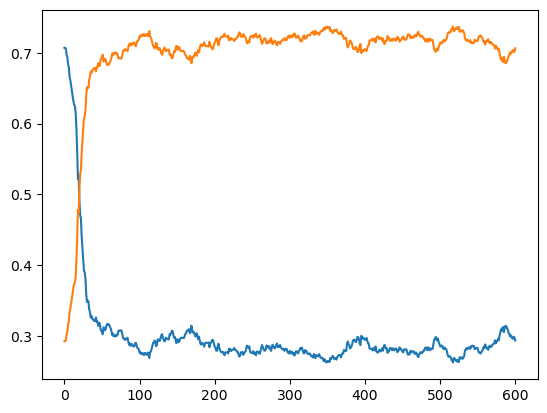

In [132]:
plt.plot(past_probs.detach()[4999:5600])

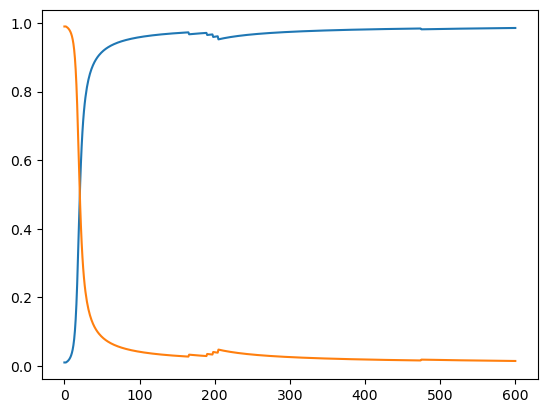

In [75]:
plt.plot(past_probs.detach()[4999:5600])

In [383]:
grad_modifier(200,100)

array([[2964.17625808, 1431.49717986],
       [1431.49717986,  801.8365065 ]])

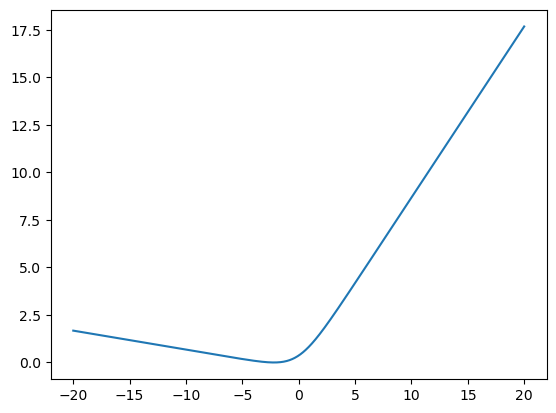

In [243]:
p=.1
logit_space = np.linspace(-20,20,1000)
plt.plot(logit_space,p*np.log(1+np.exp(-logit_space))+(1-p)*np.log(1+np.exp(logit_space))+p*np.log(p)+(1-p)*np.log(1-p))

In [240]:
a = .5
b = .5
p = a/(a+b)
epsilon = .00000001
val = np.log(x/(1-x)).dot(scipy.stats.beta.pdf(x,a,b))/len(x)
val_grad = (np.log(x/(1-x)).dot(scipy.stats.beta.pdf(x,a+epsilon,b))/len(x)-val)/epsilon
approx = np.log(a/b)+a*b*(2*p-1)/((a+b)**2*(a+b+1)*2*(p-1)**2*p**2)
a +=epsilon
approx_grad = (np.log(a/b)+a*b*(2*a/(a+b)-1)/((a+b)**2*(a+b+1)*2*(a/(a+b)-1)**2*(a/(a+b))**2)-approx)/epsilon
grad_error = np.log(approx_grad/val_grad)
print(grad_error)
print(approx_grad)
print(val_grad)
# approx_grad = (np.log((a+epsilon)/b)+(a+epsilon)*b*(2*(a+epsilon)/(a+epsilon+b)-1)/((a+b)**2*(a+b+1)*2*((a+epsilon)/(a+epsilon+b)-1)**2*(a+epsilon)/(a+epsilon+b)**2)-approx)/epsilon
error = np.log(approx/val)
print(error)
print(np.log(x/(1-x)).dot(scipy.stats.beta.pdf(x,a,b))/len(x))
print(np.log(-p/(p-1))+a*b*(2*p-1)/((a+b)**2*(a+b+1)*2*(p-1)**2*p**2))
print(approx_grad)

-0.16274916303815445
3.0000000011765087
3.530224448606171
-inf
3.530224424395842e-08
0.0
3.0000000011765087


/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_74044/405757113.py:15: RuntimeWarning: divide by zero encountered in log
  error = np.log(approx/val)


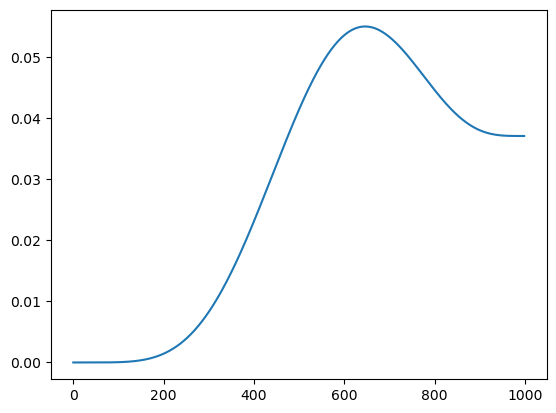

In [169]:
plt.plot(np.cumsum(-y1*(1-x)/len(x)))

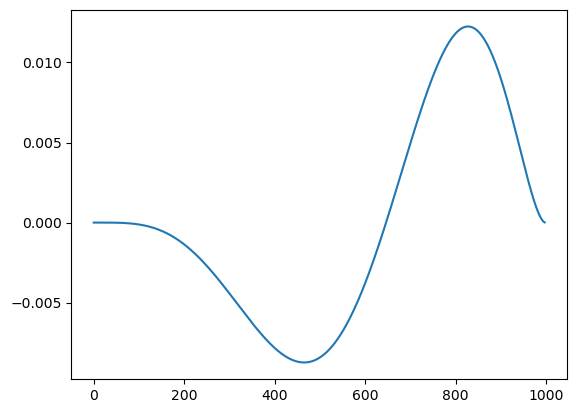

In [144]:
plt.plot(-np.diff(scipy.stats.beta.pdf(x,6.15,3.8)))

/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_74044/3646883195.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(x))


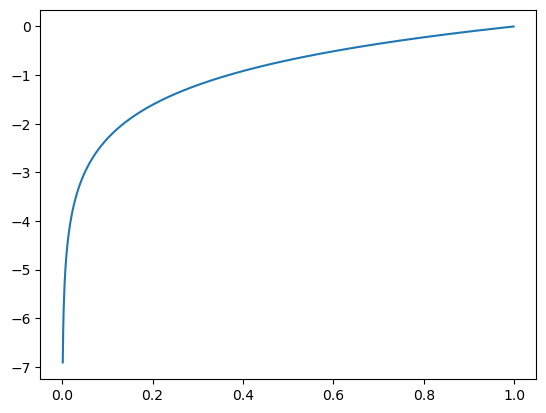

In [90]:
x=np.arange(0,1,.001)
plt.plot(x, np.log(x))

In [ ]:
n_grid = np.arange(1,2001)
p_grid=np.arange(.5,1,.001)
pg, ng = np.meshgrid(p_grid, n_grid, indexing='ij', sparse=True)
up_interp = scipy.interpolate.RegularGridInterpolator((p_grid,n_grid), up_movement)

In [ ]:
up_interp(np.array([.748932, 1.5])).item()

1.000186699

Explicitly Constructing the dynamics

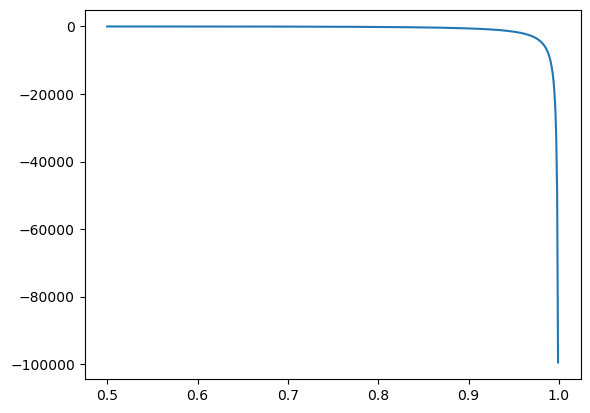

In [419]:
p_grid=np.arange(.5,1,.001)
n_grid = np.arange(1,10001)
# up_movement = 30*(np.arange(0,.5,.001)-np.log(np.arange(0,.5,.001)+1))+1
# up_movement = 3*(np.arange(0,.5,.001))+1
up_movement = 800*np.square(np.arange(0,.5,.001)[...,np.newaxis]) + 1
down_movement = ((1-up_movement*p_grid[...,np.newaxis])/(1-p_grid[...,np.newaxis])-1)*n_grid[np.newaxis,...]/4000+1
# down_movement = -(p_grid-.5)/(1-p_grid)
# down_movement = -np.arange(0,.5,.001)[...,np.newaxis]*n_grid[np.newaxis,...]/300 + 1
# down_movement = -(p_grid[...,np.newaxis]-.5)/(1-p_grid[...,np.newaxis])*n_grid[np.newaxis,...]/2001
up_movement = (1-down_movement*(1-p_grid[...,np.newaxis]))/p_grid[...,np.newaxis]
plt.plot(p_grid,down_movement[:,1999])
# plt.plot(p_grid,up_movement[:,1999])

# pg, ng = np.meshgrid(p_grid, n_grid, indexing='ij', sparse=True)
up_interp = scipy.interpolate.RegularGridInterpolator((p_grid,n_grid), up_movement)
down_interp = scipy.interpolate.RegularGridInterpolator((p_grid,n_grid), down_movement)

ema: 0.5324740037876741
ours: 0.572434557023528


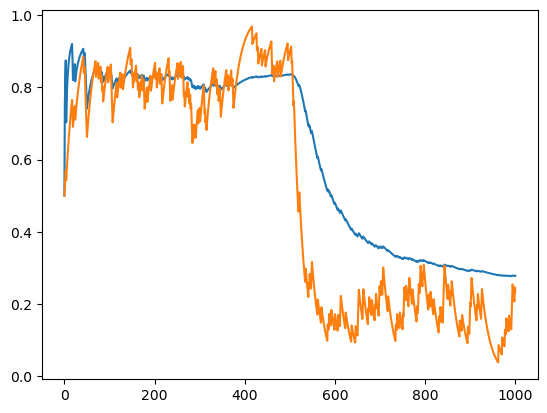

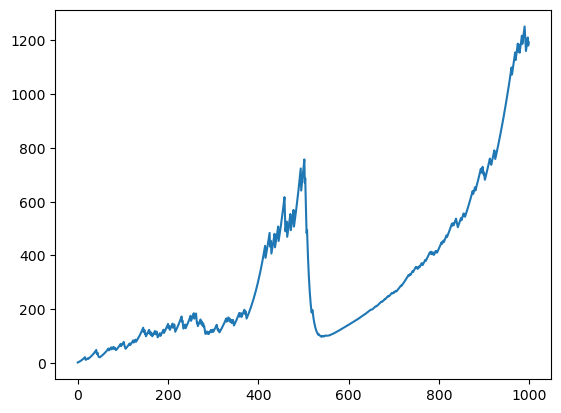

In [421]:
n = 1
p=.5
p_0 = .8
p_lr = .003
p_list = [.5]
p_moving_averages = [.5]
gamma = .95
n_list = []
true_p_list = []
for i in range(1000):
    if i>500:
        p_0=.2
    rv = np.random.binomial(1,p_0)
    if p>=.5:
        if rv:
            n,p = n+up_interp(np.array([p,n])).item(), p+(1-p)/(n+1)
        else:
            n,p = n+down_interp(np.array([p,n])).item(), p-p/(n+1)
    else:
        if rv:
            n,p = n+down_interp(np.array([1-p,n])).item(), p+(1-p)/(n+1)
        else:
            n,p = n+up_interp(np.array([1-p,n])).item(), p-p/(n+1)
    # p+=(rv/p - (1-rv)/(1-p))*p_lr
    if p >1 or p<0 or n<0:
        print(n_list[-1],p_list[-1])
        print(n-n_list[-1])
        print(rv)
        break
    p_list.append(p)
    p_moving_averages.append(p_moving_averages[-1]*gamma+rv*(1-gamma))
    n_list.append(n)
    true_p_list.append(p_0)
print('ema:',(-np.array(true_p_list)*np.log(np.array(p_moving_averages[:1000]))-(1-np.array(true_p_list))*np.log(1-np.array(p_moving_averages[:1000]))).mean())
print('ours:',(-np.array(true_p_list)*np.log(np.array(p_list[:1000]))-(1-np.array(true_p_list))*np.log(1-np.array(p_list[:1000]))).mean())
np.array(500*[.8]+500*[.2])
plt.plot(p_list)
plt.plot(p_moving_averages)
plt.show()
plt.plot(n_list)

In [ ]:
(-np.array(500*[.8]+500*[.2])*np.log(np.array(p_moving_averages[:1000]))-(1-np.array(500*[.8]+500*[.2]))*np.log(1-np.array(p_moving_averages[:1000]))).mean()

0.5489434224550075

In [ ]:
(-np.array(500*[.8]+500*[.2])*np.log(np.array(p_list[:1000]))-(1-np.array(500*[.8]+500*[.2]))*np.log(1-np.array(p_list[:1000]))).mean()

0.5600269161710356

In [573]:
x = np.linspace(-6,6,12001)

In [574]:
p = 1/(1+np.exp(-x))

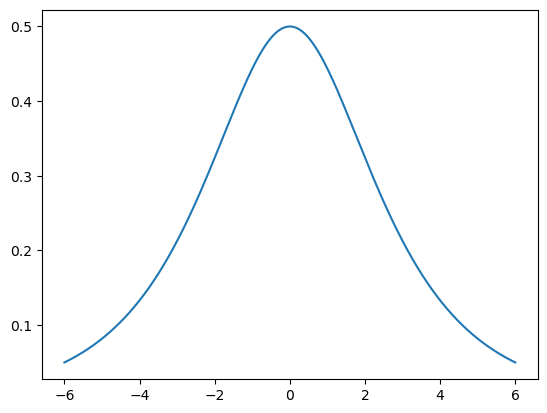

In [578]:
plt.plot(x,np.sqrt(p/(np.exp(x)+1)**2 + (1-p)/(1+np.exp(-x))**2))

In [695]:
def w(x):
    return 2/(np.exp(x)+1)

0.8007017433939528
6.692384638945773e-07


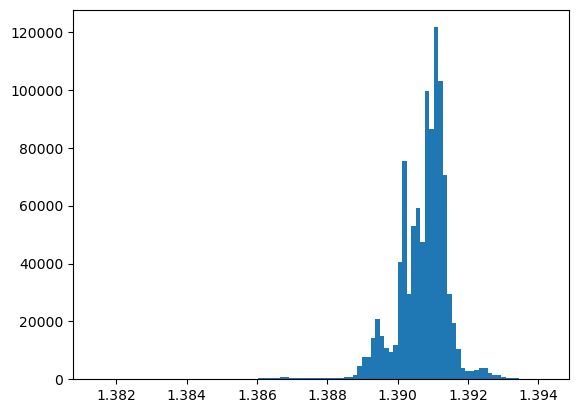

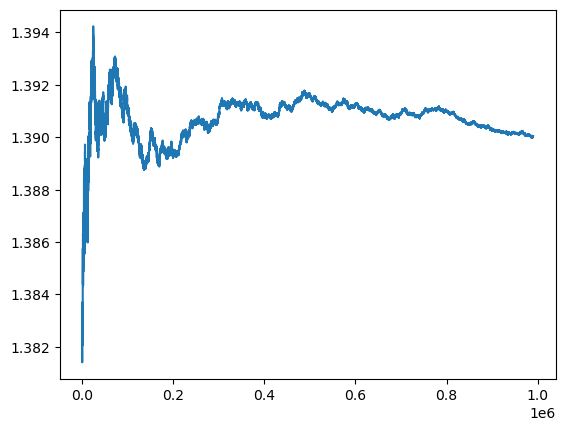

In [745]:
x = 0
p=.8
lr = 1
val_list = []
for i in range(1000000):
    x_i = np.random.binomial(1,p)
    x+=((x_i*w(x)-(1-x_i)*w(x)*np.exp(x)))*lr/(1+i)
    val_list.append(x)
val_array = np.array(val_list)
mixed_val_array = val_array[10000:]
print(1/(1+np.exp(-val_array.mean())))
print(mixed_val_array.var())
a = plt.hist(mixed_val_array, bins=100)

plt.show()
plt.plot(mixed_val_array)

In [721]:
p = a[0]/a[0].sum()

In [728]:
(a[1].max()-a[1].min())/len(a[1])

0.028796949357485686

In [730]:
.5*np.log(2*np.pi*np.e*.1023)

0.27901573019239456

In [729]:
-(p*np.log(p)).sum()*(a[1].max()-a[1].min())/len(a[1])

0.10989989629644326

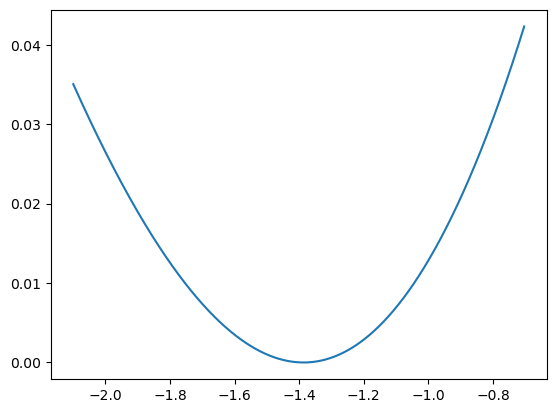

In [687]:
x = np.linspace(min(mixed_val_array), max(mixed_val_array), 1000)
q = 1/(1+np.exp(-x))
loss = -p*np.log(q/p) - (1-p)*np.log((1-q)/(1-p))
plt.plot(x, loss)

In [680]:
x

array([-1.59192069, -1.59033116, -1.58874163, -1.5871521 , -1.58556257,
       -1.58397304, -1.5823835 , -1.58079397, -1.57920444, -1.57761491,
       -1.57602538, -1.57443585, -1.57284631, -1.57125678, -1.56966725,
       -1.56807772, -1.56648819, -1.56489866, -1.56330913, -1.56171959,
       -1.56013006, -1.55854053, -1.556951  , -1.55536147, -1.55377194,
       -1.5521824 , -1.55059287, -1.54900334, -1.54741381, -1.54582428,
       -1.54423475, -1.54264521, -1.54105568, -1.53946615, -1.53787662,
       -1.53628709, -1.53469756, -1.53310803, -1.53151849, -1.52992896,
       -1.52833943, -1.5267499 , -1.52516037, -1.52357084, -1.5219813 ,
       -1.52039177, -1.51880224, -1.51721271, -1.51562318, -1.51403365,
       -1.51244411, -1.51085458, -1.50926505, -1.50767552, -1.50608599,
       -1.50449646, -1.50290693, -1.50131739, -1.49972786, -1.49813833,
       -1.4965488 , -1.49495927, -1.49336974, -1.4917802 , -1.49019067,
       -1.48860114, -1.48701161, -1.48542208, -1.48383255, -1.48

In [646]:
np.array(val_list).std()

0.4203450597215884

In [647]:
np.array(val_list).mean()

array([-0.29449769, -0.51107011, -0.22280934, ..., -0.86800616,
       -0.98754463, -1.0932383 ])

In [648]:
1/(1+np.exp(-np.array(val_list).mean()))

0.19029664848807368

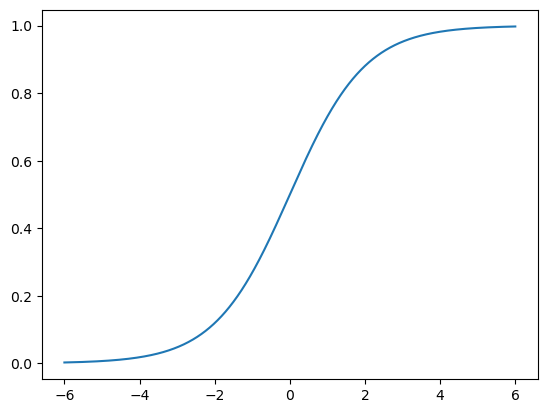

In [430]:
plt.plot(x,p)

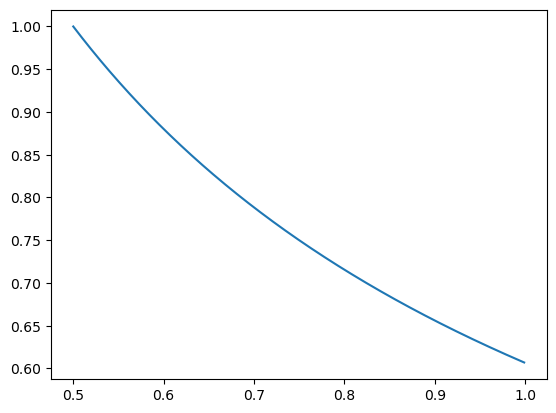

In [ ]:
p = np.arange(.5,1,.001)

plt.plot(p,p**((p-.5)/(1-p)))

In [ ]:
np.interp(.9,p_grid,down_movement)

-2.6000000000000023

In [ ]:
1-p_grid

array([0.5  , 0.499, 0.498, 0.497, 0.496, 0.495, 0.494, 0.493, 0.492,
       0.491, 0.49 , 0.489, 0.488, 0.487, 0.486, 0.485, 0.484, 0.483,
       0.482, 0.481, 0.48 , 0.479, 0.478, 0.477, 0.476, 0.475, 0.474,
       0.473, 0.472, 0.471, 0.47 , 0.469, 0.468, 0.467, 0.466, 0.465,
       0.464, 0.463, 0.462, 0.461, 0.46 , 0.459, 0.458, 0.457, 0.456,
       0.455, 0.454, 0.453, 0.452, 0.451, 0.45 , 0.449, 0.448, 0.447,
       0.446, 0.445, 0.444, 0.443, 0.442, 0.441, 0.44 , 0.439, 0.438,
       0.437, 0.436, 0.435, 0.434, 0.433, 0.432, 0.431, 0.43 , 0.429,
       0.428, 0.427, 0.426, 0.425, 0.424, 0.423, 0.422, 0.421, 0.42 ,
       0.419, 0.418, 0.417, 0.416, 0.415, 0.414, 0.413, 0.412, 0.411,
       0.41 , 0.409, 0.408, 0.407, 0.406, 0.405, 0.404, 0.403, 0.402,
       0.401, 0.4  , 0.399, 0.398, 0.397, 0.396, 0.395, 0.394, 0.393,
       0.392, 0.391, 0.39 , 0.389, 0.388, 0.387, 0.386, 0.385, 0.384,
       0.383, 0.382, 0.381, 0.38 , 0.379, 0.378, 0.377, 0.376, 0.375,
       0.374, 0.373,

In [ ]:
down_movement

array([ 1.00000000e+00,  9.98995992e-01,  9.97983936e-01,  9.96963783e-01,
        9.95935484e-01,  9.94898990e-01,  9.93854251e-01,  9.92801217e-01,
        9.91739837e-01,  9.90670061e-01,  9.89591837e-01,  9.88505112e-01,
        9.87409836e-01,  9.86305955e-01,  9.85193416e-01,  9.84072165e-01,
        9.82942149e-01,  9.81803313e-01,  9.80655602e-01,  9.79498960e-01,
        9.78333333e-01,  9.77158664e-01,  9.75974895e-01,  9.74781971e-01,
        9.73579832e-01,  9.72368421e-01,  9.71147679e-01,  9.69917548e-01,
        9.68677966e-01,  9.67428875e-01,  9.66170213e-01,  9.64901919e-01,
        9.63623932e-01,  9.62336188e-01,  9.61038627e-01,  9.59731183e-01,
        9.58413793e-01,  9.57086393e-01,  9.55748918e-01,  9.54401302e-01,
        9.53043478e-01,  9.51675381e-01,  9.50296943e-01,  9.48908096e-01,
        9.47508772e-01,  9.46098901e-01,  9.44678414e-01,  9.43247241e-01,
        9.41805310e-01,  9.40352550e-01,  9.38888889e-01,  9.37414254e-01,
        9.35928571e-01,  

In [ ]:
a_0=90
b_0=10
n = 100
samples = 1000
p=np.random.beta(a_0,b_0, size=(samples,1))
x = np.random.binomial(np.arange(1,n+1),p)
arr[j-1,i-1]=(dkl((a+x)/(a+b+np.arange(1,n+1)),p) - dkl((a_0+x)/(a_0+b_0+np.arange(1,n+1)),p)).mean(axis=0).sum()

NameError: name 'dkl' is not defined

In [ ]:
((x+alpha)/(x+alpha).sum(axis=-1).unsqueeze(-1)).shape


torch.Size([101, 1000, 3])

In [ ]:
x.shape

torch.Size([303, 1000, 1])

In [ ]:
torch.distributions.Multinomial(i,p_samples).sample().shape

torch.Size([3, 1000])

In [ ]:
torch.zeros_like(p_samples)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [ ]:
x=torch.cat([torch.distributions.Multinomial(i,p_samples).sample().unsqueeze(0) for i in range(1,101)])

tensor([[[  0.,   1.],
         [  0.,   1.],
         [  0.,   1.],
         ...,
         [  0.,   1.],
         [  0.,   1.],
         [  0.,   1.]],

        [[  0.,   2.],
         [  0.,   2.],
         [  0.,   2.],
         ...,
         [  0.,   2.],
         [  0.,   2.],
         [  0.,   2.]],

        [[  0.,   3.],
         [  0.,   3.],
         [  1.,   2.],
         ...,
         [  0.,   3.],
         [  0.,   3.],
         [  1.,   2.]],

        ...,

        [[  4.,  94.],
         [  3.,  95.],
         [  2.,  96.],
         ...,
         [  2.,  96.],
         [  2.,  96.],
         [  0.,  98.]],

        [[  1.,  98.],
         [  2.,  97.],
         [  0.,  99.],
         ...,
         [  0.,  99.],
         [  1.,  98.],
         [  3.,  96.]],

        [[  1.,  99.],
         [  3.,  97.],
         [  3.,  97.],
         ...,
         [  2.,  98.],
         [  0., 100.],
         [  0., 100.]]])

In [ ]:
torch.arange(1,n+1).view(-1,1,1)*p_samples.unsqueeze(0)

tensor([[[1.7053e-02, 9.8295e-01],
         [1.6723e-02, 9.8328e-01],
         [1.8602e-02, 9.8140e-01],
         ...,
         [1.8437e-02, 9.8156e-01],
         [1.7063e-02, 9.8294e-01],
         [1.7149e-02, 9.8285e-01]],

        [[3.4105e-02, 1.9659e+00],
         [3.3447e-02, 1.9666e+00],
         [3.7203e-02, 1.9628e+00],
         ...,
         [3.6874e-02, 1.9631e+00],
         [3.4126e-02, 1.9659e+00],
         [3.4298e-02, 1.9657e+00]],

        [[5.1158e-02, 2.9488e+00],
         [5.0170e-02, 2.9498e+00],
         [5.5805e-02, 2.9442e+00],
         ...,
         [5.5310e-02, 2.9447e+00],
         [5.1189e-02, 2.9488e+00],
         [5.1446e-02, 2.9486e+00]],

        ...,

        [[1.6712e+00, 9.6329e+01],
         [1.6389e+00, 9.6361e+01],
         [1.8230e+00, 9.6177e+01],
         ...,
         [1.8068e+00, 9.6193e+01],
         [1.6722e+00, 9.6328e+01],
         [1.6806e+00, 9.6319e+01]],

        [[1.6882e+00, 9.7312e+01],
         [1.6556e+00, 9.7344e+01],
         [1.

In [ ]:
p_samples.unsqueeze(0).shape

torch.Size([1, 1000, 2])